In [76]:
import numpy as np
import os
import sys
import sklearn


import matplotlib as mpl
import matplotlib.pyplot as plt


mpl.rc("axes",labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

    
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# 4.1 선형회귀

## 4.1.1 정규방정식

In [77]:
X= 2*np.random.rand(100,1)
y= 4+3 *X +np.random.randn(100,1) #gaussian noise
#선형처럼 보이는 데이터 생성


그림 저장: generated_data_plot


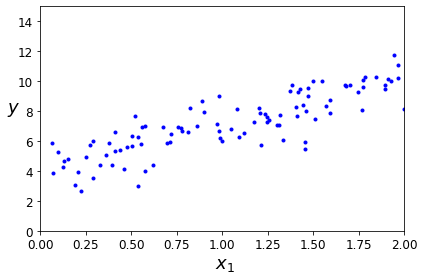

In [78]:
plt.plot(X,y,"b.")
plt.xlabel(" $x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([0,2,0,15])
save_fig("generated_data_plot")
plt.show()

#### 식 4-4: 정규 방정식

$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

In [79]:
X_b = np.c_[np.ones((100,1)),X]
#x0는 항상 1 이므로 모든 샘플에 1추가

print(X_b[0:10])
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

[[1.         0.41044017]
 [1.         0.37903809]
 [1.         0.25123123]
 [1.         0.62201401]
 [1.         1.77184423]
 [1.         1.54985694]
 [1.         1.47050243]
 [1.         1.59467361]
 [1.         0.53883578]
 [1.         1.77488338]]


In [80]:
theta_best
#기대한 4,3이랑 다른값 나옴.

array([[4.03894795],
       [3.03528472]])

#### $\hat{y} = \mathbf{X} \boldsymbol{\hat{\theta}}$

In [81]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]

print(X_new_b)

y_predict = X_new_b.dot(theta_best)
y_predict

[[1. 0.]
 [1. 2.]]


array([[ 4.03894795],
       [10.10951739]])

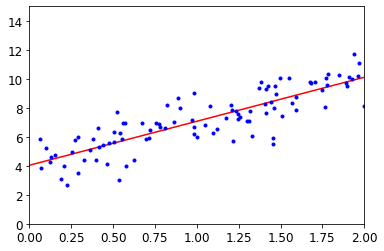

In [82]:
plt.plot(X_new,y_predict, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

그림 저장: linear_model_predictions_plot


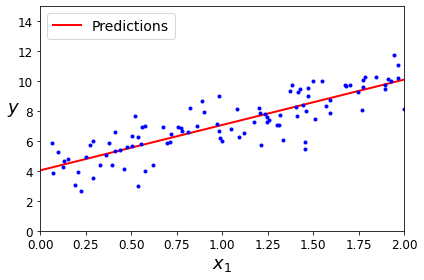

In [83]:
#범례와 축 레이블이 있는 그래프
plt.plot(X_new,y_predict,"r-",linewidth=2,label="Predictions")
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$", rotation=0,fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0,2,0,15])
save_fig("linear_model_predictions_plot")
plt.show()

#### sklearn을 통한 회귀

In [84]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.03894795]), array([[3.03528472]]))

In [85]:
lin_reg.predict(X_new)

array([[ 4.03894795],
       [10.10951739]])

In [86]:
# 싸이파이 lstsq() 함수를 사용하려면 scipy.linalg.lstsq(X_b, y)와 같이 씁니다.
# 유사 역행렬은 특잇값 분해(svd)라는 방법을 사용하여 계산.
# 정규방정식보다 효율적이며 항상 구할수있음.

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

#이 함수는 유사역행렬을 계산.

array([[4.03894795],
       [3.03528472]])

In [87]:
np.linalg.pinv(X_b).dot(y)
#얘로도 구할수 있음.

array([[4.03894795],
       [3.03528472]])

In [88]:
#svd의 계산복잡도는 O(n^2) 정규방정식의 계산복잡도는 O(n^2.4~3.0)

# 4.2 경사 하강법

#### 4.2.1 배치 경사 하강법

##### 식 4-6: 비용 함수의 그레이디언트 벡터

$
\dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
 = \dfrac{2}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$

식 4-7: 경사 하강법의 스텝

$
\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta} - \eta \dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
$

In [89]:
eta =0.1
n_iterations=1000
m=100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients
                                
    
    

In [90]:
theta

array([[4.03894795],
       [3.03528472]])

In [91]:
X_new_b.dot(theta)

array([[ 4.03894795],
       [10.10951739]])

In [92]:
theta_path_gbd = []

def plot_gradient_descent(theta,eta,theta_path =None):
    m = len(X_b)
    plt.plot(X,y,"b.")
    n_iterations = 1000
    
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration >0 else "r--"
            plt.plot(X_new,y_predict,style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
        theta = theta -eta*gradients
        if theta_path is not None:
            theta_path.append(theta)
        plt.xlabel(" $x_1$", fontsize =18)
        plt.axis([0,2,0,15])
        plt.title(r"$\eta = {}$".format(eta),fontsize=16)
    

0
1000
1000
그림 저장: gradient_descent_plot


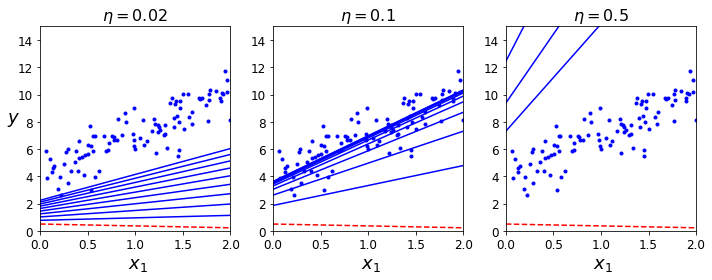

In [93]:
np.random.seed(42)
theta_path_bgd=[]
theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta,eta=0.02)
plt.ylabel("$y$",rotation=0,fontsize=18)

print(len(theta_path_bgd))#그냥 뭔지 확인

plt.subplot(132);plot_gradient_descent(theta,eta=0.1,theta_path=theta_path_bgd)

print(len(theta_path_bgd))

plt.subplot(133);plot_gradient_descent(theta,eta=0.5)

print(len(theta_path_bgd))

save_fig("gradient_descent_plot")
plt.show()

#### 4.2.2 확률적 경사 하강법

In [94]:
theta_path_sgd = []
m= len(X_b)

np.random.seed(42)

그림 저장: sgd_plot


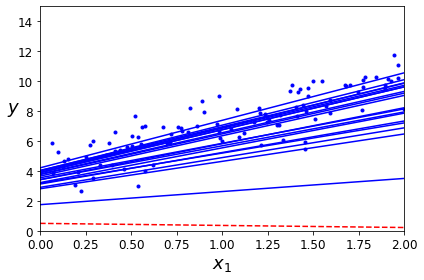

In [95]:
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)# 랜덤 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         # 처음 0 일떄만 red
            plt.plot(X_new, y_predict, style)       
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                   
plt.ylabel("$y$", rotation=0, fontsize=18)          
plt.axis([0, 2, 0, 15])                              
save_fig("sgd_plot")                                 
plt.show()                                          


In [96]:
theta

array([[4.0013927 ],
       [3.06334471]])

In [97]:
#확률적 경사 하강은 훈련샘플이 IID를 만족해야함. 
#따라서 1.랜덤선택 or 2. 에포크를 시작할떄 섞어야함

In [104]:
#sklearn 에서 SGD하는법 

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1,random_state=42)
#tol= 1e-3 손실이 0.001보다 적게 줄어들때까지 실행
sgd_reg.fit(X,y.ravel())
#ravel()은 배열을 1차원 배열로 만들어주는 함수.


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [105]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.03016969]), array([3.07017375]))

## 4.2.3 미니배치 경사 하강법

In [106]:
theta_path_mgd=[]

n_iterations =50
minibatch_size=20

np.random.seed(42)
theta =np.random.randn(2,1) #랜덤 초기화

t0, t1 = 200,1000

def learning_schedule(t):
    return t0/(t+t1)
t=0


for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    #1.셔플
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    for i in range(0,m,minibatch_size):
        #2. 셔플 후 미니배치 사이즈만큼 step
        t+=1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        
        eta = learning_schedule(t)
        theta = theta - eta *gradients
        theta_path_mgd.append(theta)

In [107]:
theta

array([[3.96299242],
       [2.96388645]])

In [108]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)


그림 저장: gradient_descent_paths_plot


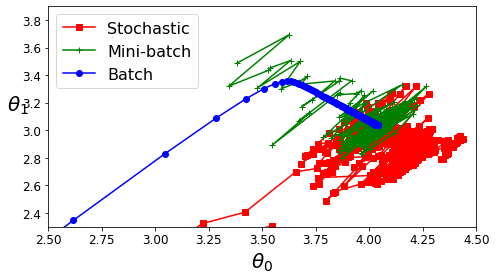

In [117]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:,0], theta_path_sgd[:,1],"r-s",label="Stochastic")
plt.plot(theta_path_mgd[:,0], theta_path_mgd[:,1],"g-+",label="Mini-batch")
plt.plot(theta_path_bgd[:,0],theta_path_bgd[:,1],"b-o",label="Batch")
plt.legend(loc="upper left",fontsize=16)
plt.xlabel(r"$\theta_0$",fontsize=20)
plt.ylabel(r"$\theta_1$",fontsize=20,rotation=0)
plt.axis([2.5,4.5,2.3,3.9])

save_fig("gradient_descent_paths_plot")
plt.show()

# 4.3 다항회귀

In [118]:
import numpy as np
import numpy.random as rnd

In [186]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

그림 저장: 2차원_data_생성_plot


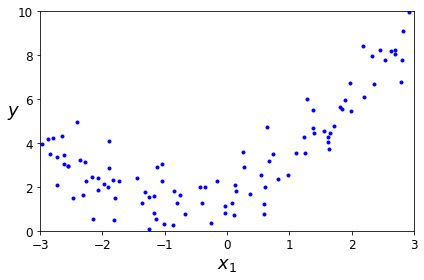

In [187]:

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("2차원_data_생성_plot")
plt.show()

In [188]:

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [189]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [190]:
lin_reg =LinearRegression() #SVD를 사용한 유사역행렬방법
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

#y= 0.5* X**2 + X + 2+np.random.randn(m,1) 
#세운 식과 비슷하게 나옴. 1차항 계수 1, 2차항 계수 0.5

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

그림 저장: 2차원 예측 Plot


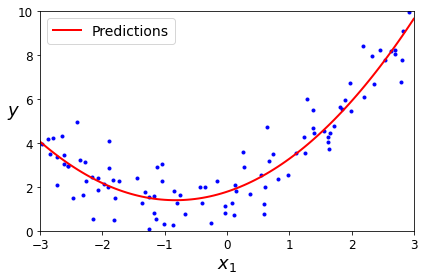

In [191]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("2차원 예측 Plot")
plt.show()

In [192]:
#PolynomialFeatures 는 특성간 모든 교차항을 추가해줌. ex) ab a^2b ab^2...

# 4.4 학습 곡선

그림 저장: high_degree_polynomials_plot


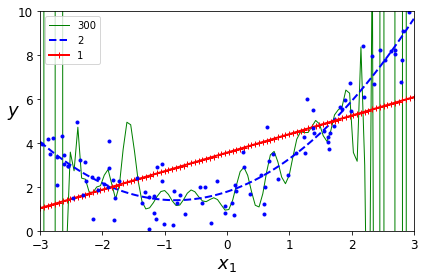

In [193]:
#이전에는 훈련셋, 교차검증의 성능 비교를 통해 과대적합, 과소적합을 판단했음.
#학습 곡선을 통해서도 가능


from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

In [194]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=10)
    train_errors,val_errors = [],[]
    for m in range(1,len(X_train)):
        #1부터 훈련셋 크기까지 비교
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="train")
    plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="val")
    plt.legend(loc="upper right",fontsize=14)
    plt.xlabel("Training set size",fontsize=14)
    plt.ylabel("RMSE",fontsize=14)
        
    

그림 저장: underfitting_learning_curves_plot


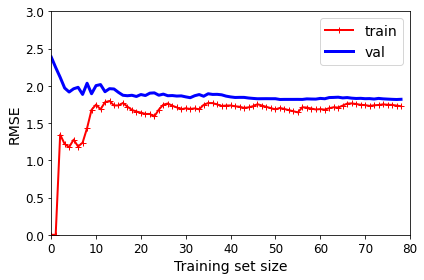

In [195]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)
plt.axis([0,80,0,3])
save_fig("underfitting_learning_curves_plot")
plt.show()

그림 저장: learning_curves_plot


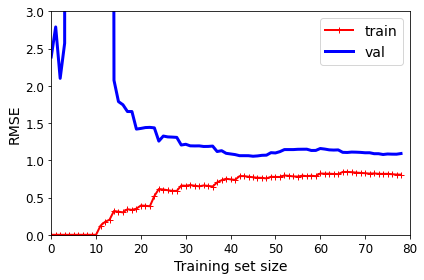

In [198]:
from sklearn.pipeline import Pipeline


polynomial_regression = Pipeline([
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("lin_reg",LinearRegression())
])

plot_learning_curves(polynomial_regression,X,y)
plt.axis([0,80,0,3])
save_fig("learning_curves_plot")
plt.show()

In [199]:
#결과비교:
#1.선형회귀보다 훨씬 낮은 훈련데이터 오차
#2.두 곡선사이에 공간. --> 과대적합 --> 더 큰 훈련셋 필요

#분산(모델이 데이터에 민감하게 반응)
#편향(잘못된 모델 가정)
#복잡한 모델을 사용하여 분산이 늘어나면 편향은 줄어든다. --> trade-off

# 4.5 규제가 있는 모델

## 4.5.1 릿지 회귀

In [200]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [212]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky",random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

그림 저장: ridge_regression_plot


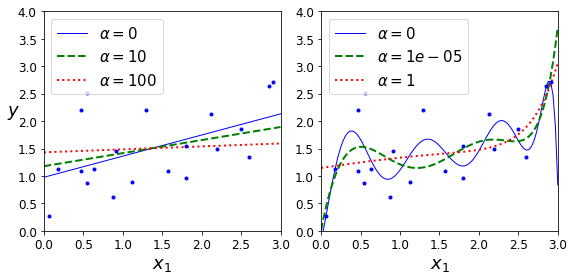

In [213]:
#정규방정식(linearRegression이용)
from sklearn.linear_model import Ridge
def plot_model(model_class, polynomial,alphas,**model_kargs):
    for alpha, style in zip(alphas, ("b-","g--","r:")):
        model = model_class(alpha,**model_kargs) if alpha>0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=10,include_bias = False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg",model),
            ])
        model.fit(X,y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1 #그냥 선굵기
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label = r"$\alpha = {}$".format(alpha))
    plt.plot(X,y,"b.",linewidth=3)
    plt.legend(loc="upper left",fontsize=15) 
    plt.xlabel("$x_1$",fontsize=18)
    plt.axis([0,3,0,4])

plt.figure(figsize=(8,4))
plt.subplot(121) #선형 with 릿지
plot_model(Ridge,polynomial=False,alphas=(0,10,100),random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122) #다항 with 릿지
plot_model(Ridge,polynomial=True,alphas = (0,10**-5,1),random_state=42)


save_fig("ridge_regression_plot")
plt.show()

In [214]:
#sgd이용
sgd_reg = SGDRegressor(penalty="l2",max_iter=1000,tol=1e-3,random_state=42)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

## 4.5.2 라쏘 회귀

/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8028677038274528, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(


그림 저장: lasso_regression_plot


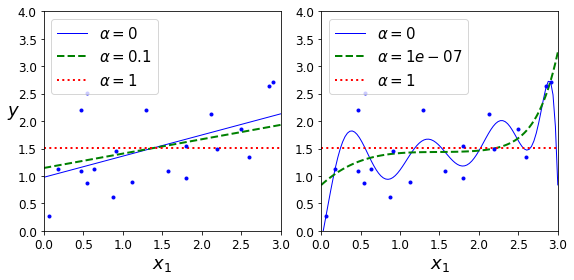

In [217]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso,polynomial=False, alphas=(0,0.1,1),random_state=42)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.subplot(122)
plot_model(Lasso,polynomial=True,alphas=(0,10**-7,1),random_state=42)

save_fig("lasso_regression_plot")
plt.show()

In [218]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

## 4.5.3 엘라스틱넷

In [220]:
#릿지와 랏소를 동시에!!!
#릿지와 라소를 r, 1-r을 통해 조절하여 모두 적용

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5,random_state=42)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])

## 4.5.4 조기종료

In [221]:
#검증에러가 최소지점을 찍고 다시 증가(과대적합) 하는 지점에서 학습을 종료함.

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train,X_val,y_train,y_val=train_test_split(X[:50],y[:50].ravel(),test_size=0.5,random_state=10)

In [224]:
from copy import deepcopy

poly_scaler =Pipeline([
    ("poly_features",PolynomialFeatures(degree=90,include_bias=False)),
    ("std_scaler",StandardScaler())

])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None, learning_rate="constant", eta0=0.0005,random_state=42)
#warm_start는 fit()메서드가 호출될 때, 처음부터 다시 시작하지 않고 이전 파라미터에서 훈련을 이어가게해줌
minimum_val_error= float("inf")
best_epoch=None
best_model=None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train)#중지된 곳에서 다시시작 warm_start여기서중요!!!
    y_val_predict=sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val,y_val_predict)
    if val_error < minimum_val_error:
        minumum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)


그림 저장: early_stopping_plot


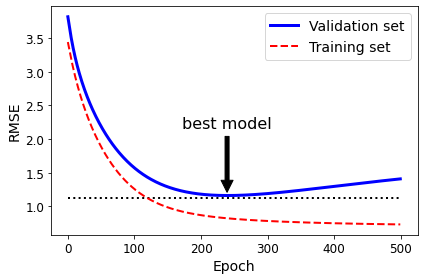

In [233]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None,learning_rate="constant",eta0=0.0005,random_state=42)


n_epochs=500

train_errors,val_errors=[],[]

for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled,y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train,y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))
    
best_epoch=np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])


plt.annotate("best model", #최소값 지점 표시
            xy=(best_epoch,best_val_rmse),
            xytext=(best_epoch,best_val_rmse+1)# 글씨표시할 좌표라서 한칸위로 올림,
            ha="center",
            arrowprops = dict(facecolor="black", shrink = 0.05),
            fontsize=16
            )

best_val_rmse -= 0.03 # just to make the graph look better
plt.plot([0,n_epochs], [best_val_rmse,best_val_rmse],"k:",linewidth=2) #최소지점 접선표현
plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="Validation set")
plt.plot(np.sqrt(train_errors),"r--",linewidth=2,label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch",fontsize=14)
plt.ylabel("RMSE",fontsize=14)
save_fig("early_stopping_plot")
plt.show()



In [231]:
best_epoch,best_model

(239,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
              shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
              warm_start=True))

# 4.6 로지스틱 회귀

## 4.6.1 확률추정

그림 저장: logistic_function_plot


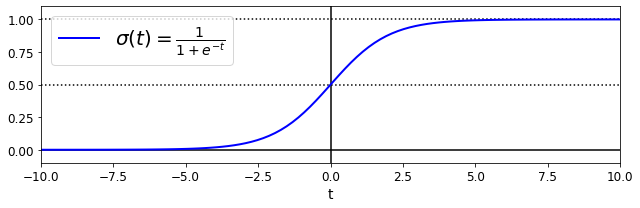

In [242]:
t= np.linspace(-10,10,100)
sig = 1/(1+np.exp(-t))
plt.figure(figsize=(9,3))
plt.plot([-10,10],[0,0],"k-")
plt.plot([-10,10],[0.5,0.5],"k:")
plt.plot([-10,10],[1,1],"k:")
plt.plot([0,0],[-1.1,1.1],"k-")
plt.plot(t,sig,"b-",linewidth=2,label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left",fontsize=20)
plt.axis([-10,10,-0.1,1.1])
save_fig("logistic_function_plot")
plt.show()

## 4.6.2 훈련과 비용함수

<ipython-input-257-5351ab249d73>:4: RuntimeWarning: invalid value encountered in log
  log1= -1*np.log(t)
<ipython-input-257-5351ab249d73>:5: RuntimeWarning: invalid value encountered in log
  log0= -1*np.log(1-t)


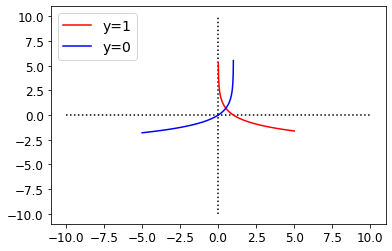

In [257]:
#log loss 이용

t=np.linspace(-5,5,1000)
log1= -1*np.log(t)
log0= -1*np.log(1-t)
plt.plot([-10,10],[0,0],"k:")
plt.plot([0,0],[-10,10],"k:")
plt.plot(t,log1,"r-",label="y=1")
plt.plot(t,log0,"b-",label="y=0")
plt.legend(loc="upper left",fontsize=14)

## 4.6.3 결정 경계

In [258]:
#꽃잎의 너비를 기반으로 붓꽃 종류 중 Iris virginica인지 아닌지 구분하기.

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())


['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [260]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [262]:
iris["data"][:3] #확인용 . 마지막이 너비임

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [263]:
X= iris["data"][:,3:]
y=(iris["target"]==2).astype(np.int) # Iris virginica이면 1 아니면 0

In [264]:
from sklearn.linear_model import LogisticRegression

log_reg =LogisticRegression(solver="lbfgs",random_state=42)
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

/opt/anaconda3/envs/env/lib/python3.8/site-packages/matplotlib/patches.py:1338: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


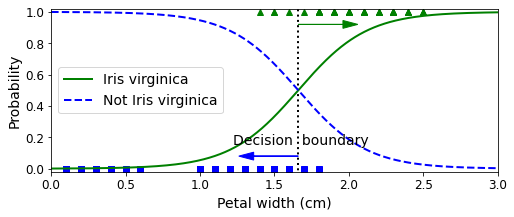

In [286]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary= X_new[y_proba[:,1]>=0.5][0]



plt.figure(figsize=(8,3))
plt.plot([decision_boundary,decision_boundary],[-1,2],"k:",linewidth=2)

plt.plot(X[y==0], y[y==0], "bs") #아닌것들의 꽃잎넓이 
plt.plot(X[y==1], y[y==1], "g^") #맞는것들의 꽃잎넓이

plt.plot(X_new,y_proba[:,1],"g-",linewidth=2,label="Iris virginica")
plt.plot(X_new,y_proba[:,0],"b--",linewidth=2,label="Not Iris virginica")

plt.xlabel("Petal width (cm)",fontsize=14)
plt.ylabel("Probability",fontsize=14)
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary,0.92,0.3,0,head_width=0.05,head_length=0.1, fc='g',ec='g')

#arrow(x,y,dx,dy)


plt.axis([0,3,-0.02,1.02])

plt.legend(loc="center left",fontsize=14)


In [287]:
decision_boundary

array([1.66066066])

In [289]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

[[9.99999998e-01 1.64270002e-09]
 [9.99999998e-01 1.72223501e-09]
 [9.99999998e-01 1.80562087e-09]
 [9.99999998e-01 1.89304404e-09]
 [9.99999998e-01 1.98470000e-09]]
1.0


(2.9, 7.0, 0.8, 2.7)

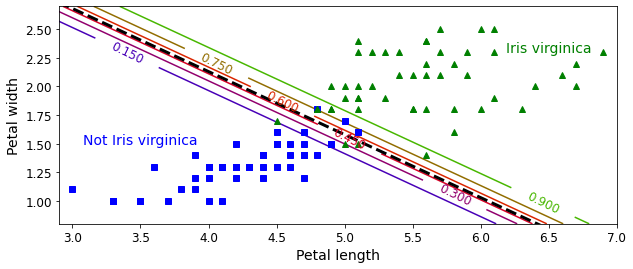

In [341]:
#두가지 변수를 사용해서 판단, 시각화

from sklearn.linear_model import LogisticRegression

X=iris["data"][:,(2,3)]
y=(iris["target"]==2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs",C=10**10,random_state=42)
log_reg.fit(X,y)

x0,x1 = np.meshgrid(
    np.linspace(2.9,7,500).reshape(-1,1),
    np.linspace(0.8,2.7,200).reshape(-1,1)
)

X_new=np.c_[x0.ravel(),x1.ravel()]
y_proba = log_reg.predict_proba(X_new)


plt.figure(figsize=(10,4))
plt.plot(X[y==0,0],X[y==0,1],"bs")

# plot(y==0인것의 0번째 속성값,y==0인것의 1번째 속성값)

plt.plot(X[y==1,0],X[y==1,1],"g^")

print(y_proba[:5])# 확인용 ㅋ [0일확률,1일확률]
print(y_proba[0][0]+y_proba[0][1])# 따라서 더하면 1나옴

zz = y_proba[:,1].reshape(x0.shape)
contour = plt.contour(x0,x1,zz,cmap=plt.cm.brg)

left_right = np.array([2.9, 7])

boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)

plt.axis([2.9, 7, 0.8, 2.7])

## 4.6.4 소프트맥스 회귀

In [344]:
X = iris["data"][:,(2,3)] # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver='lbfgs',
                                C=10,random_state=42)

softmax_reg.fit(X,y)




LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

그림 저장: softmax_regression_contour_plot


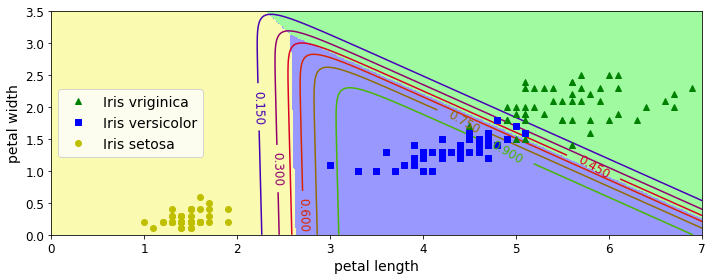

In [371]:
x0,x1 = np.meshgrid(
    
    np.linspace(0,8,500).reshape(-1,1),
    np.linspace(0,3.5,200).reshape(-1,1)
    
)

X_new = np.c_[x0.ravel(),x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)


zz1 = y_proba[:,1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10,4))
plt.plot(X[y==2,0],X[y==2,1], "g^",label="Iris vriginica")
plt.plot(X[y==1,0],X[y==1,1],"bs",label = "Iris versicolor")
plt.plot(X[y==0,0],X[y==0,1],"yo",label = "Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])


plt.contourf(x0,x1,zz,cmap=custom_cmap)
contour = plt.contour(x0,x1,zz1,cmap=plt.cm.brg)
plt.clabel(contour,inline=1,fontsize=12)
plt.xlabel("petal length",fontsize=14)
plt.ylabel("petal width",fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0,7,0,3.5])
save_fig("softmax_regression_contour_plot")
plt.show()


In [373]:
softmax_reg.predict([[5,2]])

array([2])

In [375]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

# 연습문제12. G.D with early stopping으로 소프트맥스 회귀 구현

In [461]:
X = iris["data"][:,(2,3)] #꽃잎 길이, 꽃잎 넓이
y = iris["target"]

In [462]:
X_with_bias = np.c_[np.ones([len(X),1]),X]

In [463]:
np.random.seed(2042)

In [464]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [465]:
from sklearn.preprocessing import OneHotEncoder

to_one_hot = OneHotEncoder(sparse=False)

Y_train_one_hot = to_one_hot.fit_transform(y_train.reshape(-1,1))
Y_valid_one_hot = to_one_hot.fit_transform(y_valid.reshape(-1,1))
Y_test_one_hot = to_one_hot.fit_transform(y_test.reshape(-1,1))

In [466]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums= np.sum(exps,axis=1,keepdims=True)
    return exps/exp_sums

In [467]:
n_inputs = X_train.shape[1] # ==3 특성2개, bias 1개
n_outputs = len(np.unique(y_train)) # ==3 3개의 클래스 

#### $\hat{p}_k^{(i)} = 0$이면 $\log\left(\hat{p}_k^{(i)}\right)$를 계산할 수 없습니다. nan 값을 피하기 위해 $\log\left(\hat{p}_k^{(i)}\right)$에 아주 작은 값 $\epsilon$을 추가하겠습니다

#### 학습

In [468]:
eta = 0.01
n_iterations = 5001
m= len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs,n_outputs)#가중치 초기화

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients


0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693313
2000 0.5444496861981872
2500 0.5038530181431525
3000 0.4729228972192248
3500 0.44824244188957774
4000 0.4278651093928793
4500 0.41060071429187134
5000 0.3956780375390374


In [469]:
Theta
#학습된 파라미터

array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

#### 검증세트에 대한 예측 정확도

In [470]:
logits = X_valid.dot(Theta)
Y_proba =softmax(logits)
y_predict = np.argmax(Y_proba,axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score
#0.9666666666666667 매우 잘 작동

0.9666666666666667

#### l2규제 (릿지) 추가

In [471]:
eta = 0.1
n_iterations =5001
m=len(X_train)
epsilon=1e-7
alpha=0.1 #l2 parameter

Theta = np.random.randn(n_inputs,n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss =-np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha *l2_loss
    error = Y_proba - Y_train_one_hot
    if iteration % 500 ==0:
        print(iteration,loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta*gradients

0 6.629842469083912
500 0.5339667976629505
1000 0.503640075014894
1500 0.4946891059460321
2000 0.49129684180754774
2500 0.48989924700933296
3000 0.4892990598451198
3500 0.489035124439786
4000 0.4889173621830817
4500 0.4888643337449303
5000 0.4888403120738818


In [472]:
#l2 패널티로 인해 손실은 조금 더 커보임. 결과는 val로 확인해바야함 

In [473]:
logits = X_valid.dot(Theta)
Y_proba =softmax(logits)
y_predict =np.argmax(Y_proba,axis=1)

accuracy_score = np.mean(y_predict==y_valid)
accuracy_score

#1.0달성! 릿지 l2규제로 인해 성능향상됨

1.0

#### early stopping 추가

In [474]:
eta = 0.1
n_iterations = 5001
m=len(X_train)
epsilon = 1e-7
alpha = 0.1
best_loss = np.infty

Theta = np.random.randn(n_inputs,n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients
    
    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration,loss)
    if loss<best_loss:
        best_loss = loss
    else:
        print(iteration,-1,best_loss)
        print(iteration,loss,"조기 종료!")
        break
    
    
    



0 4.7096017363419875
500 0.5739711987633518
1000 0.5435638529109128
1500 0.5355752782580262
2000 0.5331959249285544
2500 0.5325946767399382
2766 -1 0.5325460966791898
2766 0.5325460971327975 조기 종료!


In [475]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba,axis=1)

accuracy_score = np.mean(y_predict==y_valid)
accuracy_score
#똑같이 1.0이지만 더 빨리끝남

1.0

#### 시각화

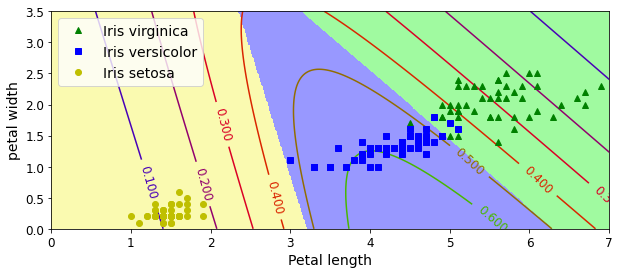

In [476]:
x0, x1 = np.meshgrid(
    np.linspace(0,8,500).reshape(-1,1),
    np.linspace(0,3.5,200).reshape(-1,1)
    
)

X_new = np.c_[x0.ravel(),x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new),1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba,axis=1)

zz1 = Y_proba[:,1].reshape(x0.shape)
zz= y_predict.reshape(x0.shape)

plt.figure(figsize=(10,4))
plt.plot(X[y==2,0],X[y==2,1],"g^",label = "Iris virginica")
plt.plot(X[y==1,0],X[y==1,1],"bs",label = "Iris versicolor")
plt.plot(X[y==0,0],X[y==0,1],"yo",label = "Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0,x1,zz,cmap=custom_cmap)
contour = plt.contour(x0,x1,zz1,cmap=plt.cm.brg)

plt.clabel(contour,inline=1,fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("petal width", fontsize= 14)
plt.legend(loc="upper left", fontsize= 14)
plt.axis([0,7,0,3.5])
plt.show()

#### Test set

In [477]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333